In [1]:
import pandas as pd
import numpy  as np

import seaborn as sb

import matplotlib.pyplot as plt

from sklearn import metrics

%matplotlib inline

In [2]:
from sklearn import linear_model

In [5]:
df = pd.read_csv("E:/myproject/Literature/bahari_data645.csv")

In [22]:
x = 4

4

In [13]:
df.shape

(644, 30)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[[
   'infection_years', 'sugar', 'swelling', 'dka', 'dsf', 'HR']],
     df['class'] , test_size=0.30,
     random_state=1)

In [17]:
X_train.shape, X_test.shape,y_test.shape

((450, 6), (194, 6), (194,))

In [18]:
from sklearn import metrics

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test,y_pred))

0.7628865979381443


In [21]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train,y_train)
#y_pred = knn.predict(X_test)
#print (metrics.accuracy_score(y_test,y_pred))

# Can we evaluate better value for K

In [22]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

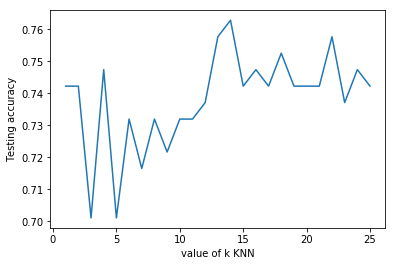

In [23]:
plt.plot(k_range,scores)
plt.xlabel('value of k KNN')
plt.ylabel('Testing accuracy')

In [26]:
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [27]:
print (TP / float(TP + FN))  # sensitivity 
print (metrics.recall_score(y_test,y_pred))

0.6176470588235294
0.6176470588235294


In [28]:
# Specificity 
print (TN / float(TN + FP))

0.8412698412698413


In [29]:
# calculate precision Rate
print (metrics.precision_score(y_test,y_pred))

0.6774193548387096


In [30]:
# F1 score 
print (metrics.f1_score(y_test,y_pred))

0.6461538461538462


In [21]:
# print the first 10 predicted probabilities of class membership
knn.predict_proba(X_test)[0:10, :]

array([[0.75, 0.25],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.75, 0.25]])

In [22]:
# print the first 10 predicted probabilities of class membership
knn.predict_proba(X_test)[0:10, :]

array([[0.75, 0.25],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.75, 0.25],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.75, 0.25]])

In [20]:
# store the predicted probabilities for class 1
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Decrease the threshold for predicting diabetes to increase the sensitivity

In [21]:
# predict diabetes if the predicted probability is greater then 0.30
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(1,-1), 0.4)[0]

In [22]:
plt.rcParams['font.size'] = 14

Text(0.5, 1.0, 'Frequency')

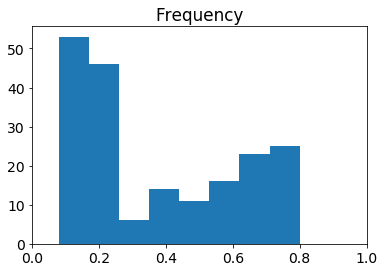

In [23]:
# histogram of predicted probabilities
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.title('Hitogram of predicted probabilities')
plt.title('predicted probability of diabetes')
plt.title('Frequency')

In [25]:
# previous confusion matrix (threshold of 0.5)
print (confusion)

[[97 29]
 [26 42]]


In [26]:
# new confusion matrix (threshold of 0.3)
print (metrics.confusion_matrix(y_test,y_pred_class))

[[94 32]
 [23 45]]


In [27]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
TP2 = confusion[1,1]
TN2 = confusion[0,0]
FP2 = confusion[0,1]
FN2 = confusion[1,0]

In [28]:
# General accuracy score
print (metrics.accuracy_score(y_test,y_pred_class))
#print ((86 + 47) / float(86 + 40 + 21 + 47))

0.7164948453608248


In [29]:
# sensitivity has increased (used to be 0.74)     recall
print (metrics.recall_score(y_test,y_pred_class))
#print (47 / float(47 + 21))

0.6617647058823529


In [30]:
# specificity has decreased 
print (TN2 / float(TN2 + FP2))
#print (86 / float(86 + 40))

0.746031746031746


In [31]:
# calculate Precision Rate
print (metrics.precision_score(y_test,y_pred_class))

0.5844155844155844


In [32]:
from sklearn.metrics import f1_score

In [33]:
# F1 score
print (metrics.f1_score(y_test,y_pred_class))
#print ((2*47) / float(2*47+21+40))

0.6206896551724138


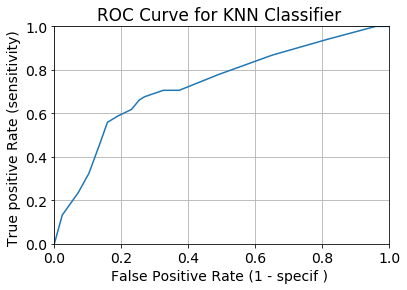

In [34]:
# important: first argument is true values, second is predicted probabilities
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for KNN Classifier ')
plt.xlabel('False Positive Rate (1 - specif ) ')
plt.ylabel('True positive Rate (sensitivity) ')
plt.grid(True)